In [55]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np 
import math as m 

Defs
--
Do not Change!

In [58]:
#closest values function
#This function takes the angles associated with each (x,y) coordinate and then, given a desired angle,
#it finds the indexes of the 2 closest neighbours (one above and one below). It always find the lower neighbour 
#angle first! The special case where two coordinates  have the same associated theta is delt with 
#and assumes that the original series of coorindates are defined counter clockwise around the origin. 

#NOTE: To run this definition, you need to have made a list where each entry is the inververse tan of 
#the corresponding (x,y) point of the desired shape i.e input_list= [atan(y1/x1),..., atan(yn.xn)] given 
#shape described by n points. 

def neighbours_index(input_list,input_value):
    j=[]
    for i in range(0,len(input_list)):
        if input_value>=input_list[i]:
            j.append(input_list[i])
            theta1=max(j)
            ind=input_list.index(theta1)
            thetas_index.clear()
            thetas_index.append(ind)
            thetas_index.append((ind+1)%len(input_list))
            
        if len(thetas_index)==0:
            ind_new= input_list.index(max(input_list))
            thetas_index.clear()
            thetas_index.append(ind_new)
            thetas_index.append((ind_new+1)%len(input_list))
            
        #else:
            #thetas_index[0]=ind
            #thetas_index[1]=(ind+1)%len(input_list)
        
#special case= when two input thetass are the same 
        if input_list[thetas_index[0]]==input_list[thetas_index[1]]:
            thetas_index[0]=thetas_index[1]
            thetas_index[1]=(thetas_index[1]+1)%len(input_list)

    #print(thetas_index) #sanity check


In [59]:
#spoke Model Def
#

def spoke_model_approx(ns, x_input_list,y_input_list):
    #lists and Values 
    theta_spoke=(2*m.pi)/ns #angle between each spoke
    theta=[]
    #thetas_index=[]
    lower_index=[]
    upper_index=[]
    x_1=[]
    y_1=[]
    x_2=[]
    y_2=[]
    
    #getting list of Thetas for exact shape- generates theta values to input into nearest neighbours def 
    for i in range(0,len(x_input_list)):
        if x_input_list[i]==0 and y_input_list[i]>0:
            theta.append((m.pi)/2)

        elif x_input_list[i]==0 and y_input_list[i]<0:
            theta.append((3*(m.pi))/2)
        
        else:
            theta.append(m.atan(y_input_list[i]/x_input_list[i]))
    
        if x_input_list[i]<0:
            theta[i]+=m.pi 
        
        else:
            if y_input_list[i]<0:
                theta[i]+=2*m.pi
            
      
    #running loop over multiple angles to get approximate for shape
    for i in range(0,ns):
        thetas_index.clear()
        neighbours_index(theta,i*theta_spoke)
        lower_index.append(thetas_index[0])
        upper_index.append(thetas_index[1])
        x_1.append(x_input_list[lower_index[i]])
        y_1.append(y_input_list[lower_index[i]])
        x_2.append(x_input_list[upper_index[i]])
        y_2.append(y_input_list[upper_index[i]])
    
    #Creating approx points
    for i in range(0,n):
        #grad=(y_2[i]-y_1[i])/(x_2[i]-x_1[i])# testing for infinte gradient
        if abs(x_2[i]-x_1[i])<0.0000001:
            x_3=x_1[i]
        else:
            x_3= (y_1[i]-((y_2[i]-y_1[i])/(x_2[i]-x_1[i]))*x_1[i])/(m.tan(theta_spoke*i)-((y_2[i]-y_1[i])/(x_2[i]-x_1[i])))
    
        x_approx.append(x_3)
        y_approx.append(m.tan(theta_spoke*i)*x_approx[i])

    plt.plot(x_input_list,y_input_list,"-",label="Exact Shape")
    plt.plot(x_approx,y_approx,"-",label="Spoke Model Appoximation")
    plt.legend(bbox_to_anchor=(1, 1))
    plt.axis("equal")
    
    

Running Code for your shape
---



[[ 1.55940108e+00  0.00000000e+00]
 [ 1.49472948e+00  1.12014489e-01]
 [ 1.43456316e+00  2.16225606e-01]
 [ 1.37783491e+00  3.14481827e-01]
 [ 1.18662521e+00  3.66025404e-01]
 [ 9.32617519e-01  3.66025404e-01]
 [ 7.60059583e-01  3.66025404e-01]
 [ 6.33974596e-01  3.66025404e-01]
 [ 5.36860665e-01  3.66025404e-01]
 [ 4.58981339e-01  3.66025404e-01]
 [ 3.94481567e-01  3.66025404e-01]
 [ 3.48076211e-01  3.75136938e-01]
 [ 3.48076211e-01  4.36473764e-01]
 [ 3.48076211e-01  5.10534035e-01]
 [ 3.48076211e-01  6.02885683e-01]
 [ 3.48076211e-01  7.22787701e-01]
 [ 3.48076211e-01  8.86883723e-01]
 [ 3.48076211e-01  1.12843536e+00]
 [ 3.16011728e-01  1.38453784e+00]
 [ 2.17277507e-01  1.44154207e+00]
 [ 1.12559421e-01  1.50200109e+00]
 [ 9.59502989e-17  1.56698730e+00]
 [-1.22739984e-01  1.63785126e+00]
 [-2.58697599e-01  1.71634643e+00]
 [-4.11938397e-01  1.80482004e+00]
 [-5.55519849e-01  1.80095112e+00]
 [-6.45591997e-01  1.64494158e+00]
 [-7.25505405e-01  1.50652750e+00]
 [-7.97649731e-01  1

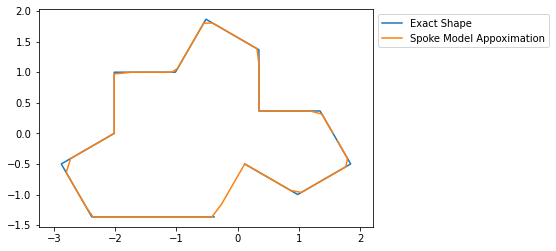

In [64]:
#You need to input your desired values 

#test values for you to check/ play with using the hat shape, comment out if 
x_list_test=[0.1160254037844387, 0.9820508075688771, 1.848076211353316, 1.348076211353316, 0.34807621135331607, 0.3480762113533162, -0.5179491924311225, -1.0179491924311228, -2.017949192431123, -2.017949192431123, -2.8839745962155607, -2.3839745962155607, -1.3839745962155612, -0.3839745962155613]
y_list_test=[-0.5000000000000001, -1.0000000000000007, -0.5000000000000007, 0.36602540378443815, 0.3660254037844383, 1.366025403784438, 1.866025403784438, 0.9999999999999997, 1.0, 0.0, -0.5000000000000001, -1.3660254037844388, -1.3660254037844388, -1.3660254037844388]

n=84 #number of spokes for ISSS make sure its in multiples of 12
x_list= x_list_test #x values associated with your exact description of the shape
y_list= y_list_test #y values associated with your exact description of the shape
name= "your_name" #filename you wish to save it as 

#do not change/ do not remove otherwise error- list needs to be outisde 
thetas_index=[] 
x_approx=[]
y_approx=[]

#running the approximation model

spoke_model_approx(n,x_list,y_list)

#sanity check! comment out if you want 
#print(x_approx)
#print(y_approx)


#dot not change 
data = np.array([x_approx, y_approx])
data = data.T
print(data)
#saving as a dat file for upload to ISSS, uncomment when you want to save and input path details

#small_path= #input your path to where you want to save file 
#path= small_path+name+"_"+str(n)+".dat"
#np.savetxt(path, data)
